# Feature Selection & Feature Extraction (Dimensionality Reduction)
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.

Here we look for a brief explanation (what, why, how etc.) & code for the below Feature Selection techniques

| Filter   Methods | Wrapper Methods | Embedded Methods |
|---|---|---|
| Generic set of methods which do not   incorporate a specific machine learning algorithm. | Evaluates on a specific machine learning algorithm to find optimal   features. | Embeds (fix) features during model building process. Feature selection is   done by observing each iteration of model training phase. |
| Much fastercompared to Wrapper methods in   terms of time complexity | High computation time for a dataset with many features | Sits between Filter methods and Wrapper methods in terms of time   complexity |
| Less prone to over—fitting | High chances of over-fitting because it involves training of machine   learning models with different combination of features | Generally used to reduce over—fitting by penalizing the coefficients of a   model being too large. |
| Examples: Correlation, Chi-Square test,   ANOVA, Information gain etc | Examples - Fomard Selection, Backward elimination, Bi-directional   elimination(Stepwise Selection) etc. | Examples— LASSO, Elastic Net, Ridge Regression etc. |
1. Filter Methods (Univariate Selection): 
  - 1.1. Pearson's Correlation Coefficient
  - 1.1. Kendall Tau correlation coefficient
  - 1.3. Spearman rank correlation
  - 1.4. ANOVA test 
  - 1.5. χ <sup>2</sup> i.e. Chi Square Test

2. Wrapper Methods:
  - 2.1. Sequential Feature Selection (SFS)
    - 2.2.1. Backward Elimination
    - 2.2.2. Forward Selection
    - 2.2.3 Bi-directional elimination (Stepwise Selection)
  - 2.2. Recursive feature elimination (RFE)

3. Embedded Methods:
  - 3.1. LASSO - Least Absolute Shrinkage and Selection Operator
  - 3.2. Decision Trees
  - 3.3. Linear Support Vector Classification (LinearSVC)
  - 3.4. Genetic Algorithms

4. Feature Extraction Techniques (NOT Feature Selection):
  - 4.1.	Principal Component Analysis (or PCA)
  - 4.2.	LDA (Linear Discriminate Analysis)
  - 4.3.	t-Distributed Stochastic Neighbor Embedding (t-SNE) 

Examples use the Pima Indians onset of diabetes dataset to demonstrate the feature selection method . This is a binary classification problem where all of the attributes are numeric. 

## Note
given the stochastic nature of the algorithms or evaluation procedures, or differences in numerical precision, results can vary. Consider running the example a few times and compare the average outcome.

# 1. Filter Methods (Univariate Selection)

Filter Methods considers the relationship between features and the target variable to compute the importance of features. Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

n.b. Univariate test - meaning it does not consider multiple variables together and their possible interactions. 

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data. 

## 1.1. Pearson's Correlation Coefficient

Here, first, we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1

- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

In [61]:
#importing libraries
# We will be selecting features using the above listed methods for the regression problem of predicting the “MEDV” column.
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


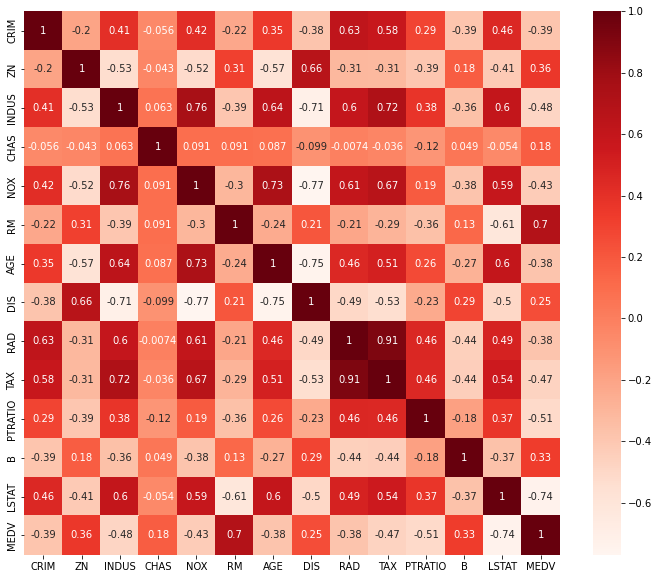

In [62]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [63]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV. Hence we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [ ]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


From the above code, it is seen that the variables RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.
After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.

## 1.2 Kendall Tau correlation coefficient

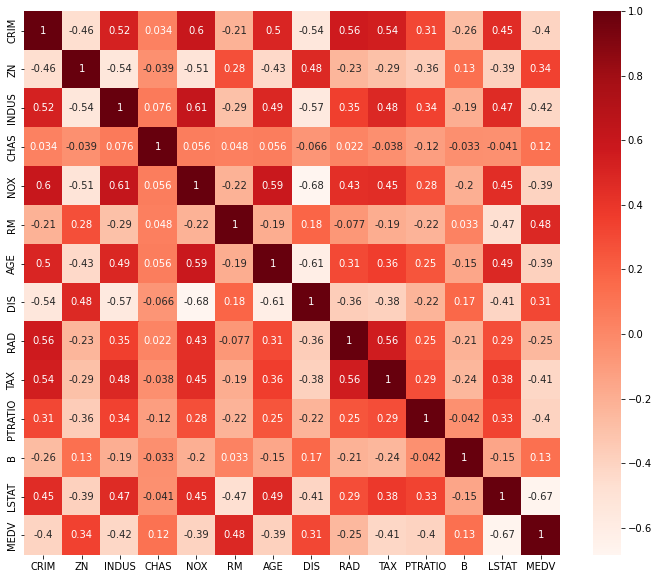

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 1.3. Spearman rank correlation

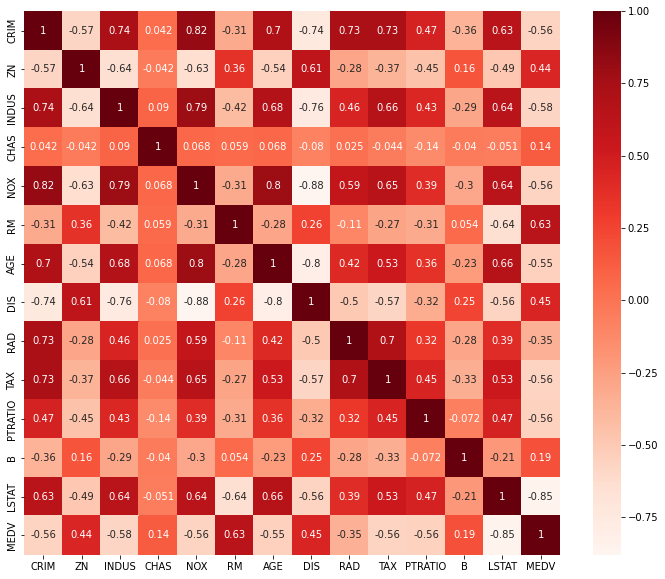

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# 1.4. ANOVA F-value method

Scikit learn provides the Selecting K best features using F-Test:

```sklearn.feature_selection.f_regression```

For Classification tasks:

```sklearn.feature_selection.f_classif```

There are some drawbacks of using F-Test to select your features. F-Test checks for and only captures linear relationships between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score.

Correlation is highly deceptive as it doesn’t capture strong non-linear relationships. Also, Using summary statistics like correlation may be a bad idea, as illustrated by Anscombe’s quartet.
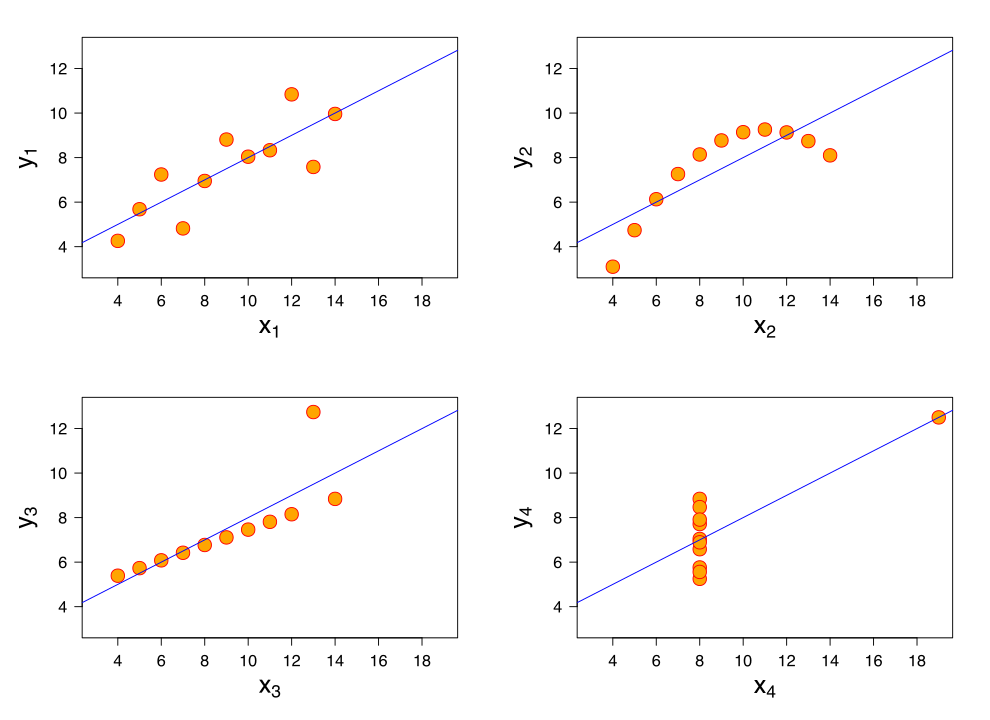

Francis Anscombe illustrates how four distinct datasets have same mean, variance and correlation to emphasize ‘summary statistics’ does not completely describe the datasets and can be quite deceptive


In [68]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [69]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores). Specifically features with indexes 0 (preq), 1 (plas), 5 (mass), and 7 (age).

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation

## Note
Feature selection with sparse data: 

If you use sparse data (i.e. data represented as sparse matrices), chi2, mutual_info_regression, mutual_info_classif will deal with the data without making it dense.

## Warning
Beware not to use a regression scoring function with a classification problem, you will get useless results.


## 1.5 χ <sup>2</sup> : Chi Square Test

In [66]:
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## Others:

This same ```sklearn.feature_selection.SelectKBest``` has other statistical methods available:
- ```f_classif``` : ANOVA F-value between label/feature for classification tasks.
- ```mutual_info_classif``` : Mutual information for a discrete target.
- ```chi2``` : Chi-squared stats of non-negative features for classification tasks.
- ```f_regression``` : F-value between label/feature for regression tasks.
- ```mutual_info_regression``` : Mutual information for a continuous target.
- ```SelectPercentile``` : Select features based on percentile of the highest scores.
- ```SelectFpr``` : Select features based on a false positive rate test.
- ```SelectFdr``` : Select features based on an estimated false discovery rate.
- ```SelectFwe``` : Select features based on family-wise error rate.
- ```GenericUnivariateSelect``` : Univariate feature selector with configurable mode.



- For regression: ```f_regression```, ```mutual_info_regression```
- For classification: ```chi2```, ```f_classif```, ```mutual_info_classif```


# 2. Wrapper Methods:
A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.  


## 2.1. & 2.2. Sequential Feature Selection (SFS)

*Sequential Feature Selection (SFS) can be either forward or backward:*

Forward-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero feature and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

Backward-SFS follows the same idea but works in the opposite direction: instead of starting with no feature and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

SFS differs from RFE and SelectFromModel in that it does not require the underlying model to expose a coef_ or feature_importances_ attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches. For example in backward selection, the iteration going from m features to m - 1 features using k-fold cross-validation requires fitting m * k models, while RFE would require only a single fit, and SelectFromModel always just does a single fit and requires no iterations.

## 2.1. Backward Elimination
As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.


In [70]:
#importing libraries
# We will be selecting features using the above listed methods for the regression problem of predicting the “MEDV” column.
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

# 1 loop 
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

As we can see that the variable ‘AGE’ has highest pvalue of 0.9582293 which is greater than 0.05. Hence we will remove this feature and build the model once again.

In [71]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## 2.2. Forward Selection
This method allows you to search for the best feature w.r.t model performance and add them to your feature subset one after the other.

For data with n features,
- On first round ‘n’ models are created with individual feature and the best predictive feature is selected.
- On second round, ‘n-1’ models are created with each feature and the previously selected feature.
- This is repeated till a best subset of ‘m’ features are selected.


In [72]:
from sklearn.datasets import load_diabetes
#  load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

To get an idea of the importance of the features, we are going to use the ```RidgeCV``` estimator. The features with the highest absolute coef_ value are considered the most important. We can observe the coefficients directly without needing to scale them (or scale the data) because from the description above, we know that the features were already standardized. For a more complete example on the interpretations of the coefficients of linear models, you may refer to [Common pitfalls in the interpretation of coefficients of linear models](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py).

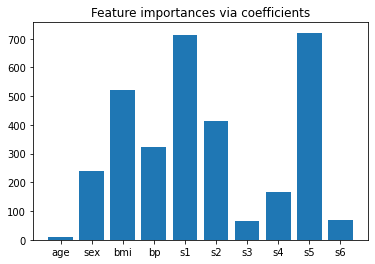

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

Now we want to select the two features which are the most important according to the coefficients. The SelectFromModel is meant just for that. SelectFromModel accepts a threshold parameter and will select the features whose importance (defined by the coefficients) are above this threshold.

Since we want to select only 2 features, we will set this threshold slightly above the coefficient of third most important feature.

In [74]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['s1' 's5']
Done in 0.007s


## Selecting features with Sequential Feature Selection


Another way of selecting features is to use SequentialFeatureSelector (SFS). SFS is a greedy procedure where, at each iteration, we choose the best new feature to add to our selected features based a cross-validation score. That is, we start with 0 features and choose the best single feature with the highest score. The procedure is repeated until we reach the desired number of selected features.

We can also go in the reverse direction (backward SFS), i.e. start with all the features and greedily choose features to remove one by one. We illustrate both approaches here.

In [75]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['bmi' 's5']
Done in 0.217s
Features selected by backward sequential selection: ['bmi' 's5']
Done in 1.142s


## 2.2.3. Bi-directional elimination(Step-wise Selection)
It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

Hence, It is a combination of forward selection and backward elimination. In short, the steps involved in bi-directional elimination are as follows:

1. Choose a significance level to enter and exit the model (e.g. SL_in = 0.05 and SL_out = 0.05 with 95% confidence).
2. Perform the next step of forward selection (newly added feature must have p-value < SL_in to enter).
3. Perform all steps of backward elimination (any previously added feature with p-value>SL_out is ready to exit the model).
4. Repeat steps 2 and 3 until we get a final optimal set of features.



In [76]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [78]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
stepwise_selection(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

## 2.2. Recursive feature elimination (RFE)
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [79]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
estimator = LogisticRegression(solver='lbfgs')
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)

print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 5
Selected Features: [ True  True False False False  True  True  True]
Feature Ranking: [1 1 2 3 4 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [80]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 5
Selected Features: [ True  True  True  True  True False False False False False]
Feature Ranking: [1 1 1 1 1 6 4 3 2 5]


```RFECV``` performs RFE in a cross-validation loop to find the optimal number of features.

A recursive feature elimination example with automatic tuning of the number of features selected with cross-validation:

Optimal number of features : 3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


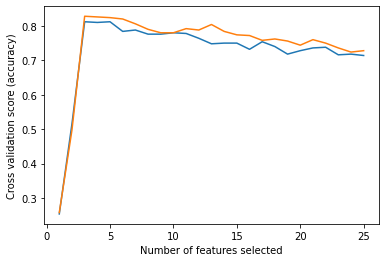

In [81]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

# 3. Embedded Methods:
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

## 3.1. LASSO - Least Absolute Shrinkage and Selection Operator

L1-recovery and compressive sensing:

For a good choice of alpha, the Lasso can fully recover the exact set of non-zero variables using only few observations, provided certain specific conditions are met. In particular, the number of samples should be “sufficiently large”, or L1 models will perform at random, where “sufficiently large” depends on the number of non-zero coefficients, the logarithm of the number of features, the amount of noise, the smallest absolute value of non-zero coefficients, and the structure of the design matrix X. In addition, the design matrix must display certain specific properties, such as not being too correlated.

There is no general rule to select an alpha parameter for recovery of non-zero coefficients. It can by set by cross-validation (```LassoCV``` or ```LassoLarsCV```), though this may lead to under-penalized models: including a small number of non-relevant variables is not detrimental to prediction score. BIC (```LassoLarsIC```) tends, on the opposite, to set high values of alpha.

Reference Richard G. Baraniuk “Compressive Sensing”, IEEE Signal Processing Magazine [120] July 2007



In [82]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

# import dataset
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

# split dataset to test and train, and calcukate on train only 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# build our model, optimize its hyperparameter and train it on the training dataset.
# Since our dataset needs to be scaled in advance, we can make use of the powerful Pipeline object in scikit-learn. 
# Our pipeline is made by a StandardScaler and the Lasso object itself.

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])



For this example, we are going to test several values from 0.1 to 10 with 0.1 step. For each value, we calculate the average value of the mean squared error in a 5-folds cross-validation and select the value of α that minimizes such average performance metrics. We can use the GridSearchCV object for this purpose.

In [83]:
# optimize the α hyperparameter of Lasso regression
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

We use neg_mean_squared_error because the grid search tries to maximize the performance metrics, so we add a minus sign to minimize the mean squared error.

In [84]:
# fit grid search 
search.fit(X_train,y_train)
print(f'The best value for α is: {search.best_params_}')

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..............model__alpha=0.1;, score=-3051.717 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.1;, score=-3405.310 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.1;, score=-2593.336 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.1;, score=-3309.657 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.1;, score=-3512.096 total time=   0.0s
[CV 1/5] END ..............model__alpha=0.2;, score=-3057.680 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.2;, score=-3413.510 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.2;, score=-2606.352 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.2;, score=-3317.452 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.2;, score=-3502.683 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-3057.765 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004

In [85]:
# get the values of the coefficients of Lasso regression.
coefficients = search.best_estimator_.named_steps['model'].coef_
# The importance of a feature is the absolute value of its coefficient, so:
importance = np.abs(coefficients)
importance

array([ 0.151,  9.005, 26.902, 18.049,  5.419,  0.   , 12.279,  0.   ,
       19.489,  0.   ])

As we can see, there are 3 features with 0 importance. Those features have been discarded by our model.

In [86]:
print('The features that survived the Lasso regression are:')
print(np.array(features)[importance > 0])

print('The discarded features are:')
print(np.array(features)[importance == 0])



The features that survived the Lasso regression are:
['age' 'sex' 'bmi' 'bp' 's1' 's3' 's5']
The discarded features are:
['s2' 's4' 's6']


Select an alpha parameter for recovery of non-zero coefficients by cross-validation i.e. ```LassoCV```

In [88]:
#importing libraries
# We will be selecting features using the above listed methods for the regression problem of predicting the “MEDV” column.
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [89]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [90]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

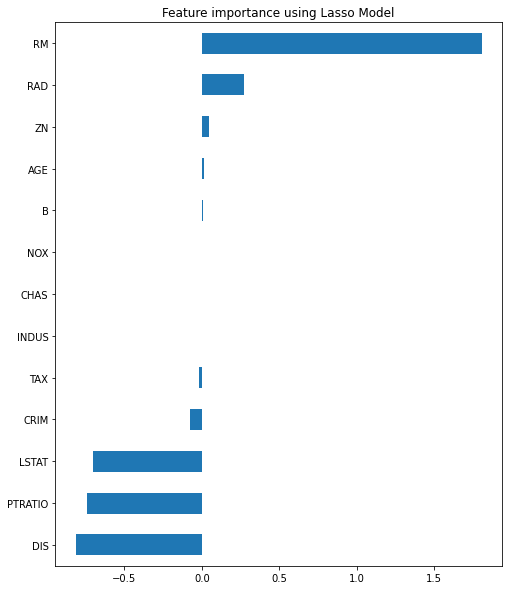

In [91]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## 3.2 Decison Trees
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

Tree based models calculates feature importance for they need to keep the best performing features as close to the root of the tree. Constructing a decision tree involves calculating the best predictive feature.

The feature importance in tree based models are calculated based on Gini Index, Entropy or Chi-Square value.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset.


In [92]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.111 0.238 0.098 0.079 0.076 0.145 0.118 0.135]


You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of plas, age and mass.

## 3.3. Linear Support Vector Classification (LinearSVC)

## Selecting From Model
```SelectFromModel``` is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as coef_, feature_importances_) or via an importance_getter callable after fitting. The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”. In combination with the threshold criteria, one can use the max_features parameter to set a limit on the number of features to select.

##  L1-based feature selection
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are:

- ```Lasso``` for regression
- ```LogisticRegression``` for regression
- ```LinearSVC``` for classification

In [93]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(f'Initial X Shape: {X.shape}')

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(f'New X Shape: {X_new.shape}')

Initial X Shape: (150, 4)
New X Shape: (150, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected. With Lasso, the higher the alpha parameter, the fewer features selected.

## 3.4. Genetic Algorithms from [this post](https://towardsdatascience.com/feature-selection-with-genetic-algorithms-7dd7e02dd237)
For this ipynb, I am using a genetic algorithm for feature selection. But, a genetic algorithm can also be used for hyper-parameter optimization. Because the steps are pretty straightforward and generalized, it applies to many different areas.

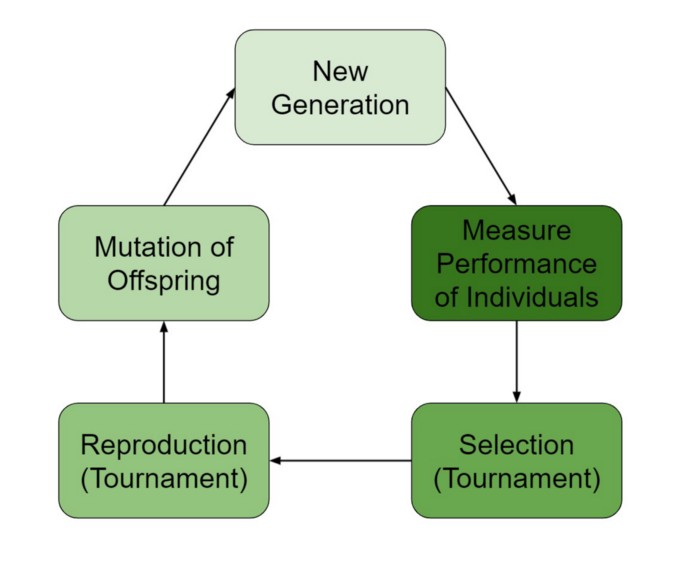

Selecting features is an NP-Hard problem. The optimal configuration is a set or subset of those features, given a set of features. This method is a discrete selection. With a permutation of possibilities, it is very costly to determine the optimal feature set.

Genetic algorithms use an approach to determine an optimal set based on evolution. For feature selection, the first step is to generate a population based on subsets of the possible features.

From this population, the subsets are evaluated using a predictive model for the target task. Once each member of the population is considered, a tournament is performed to determine which subsets will continue into the next generation.

The next generation is composed of the tournament winners, with some cross over (update the winning feature sets with features from the other winners) and mutation (introduce or remove some features at random).

1. An initial population is produced.
2. A score is attached to the members of the population.
3. A subset is selected for reproduction with a tournament.
4. Select genetic material to pass on.
5. Apply mutations.
6. Repeat over multiple generations.

The algorithm runs for a set number of generations (iterations). After which, the optimal member of the population is the selected features.

The experiments are based on the UCI breast cancer dataset, which contains 569 instances and 30 features. With this dataset, I test several classifiers with all of the features, the subset of features from the genetic algorithm, and five features using the chi-squared test for comparison.
Below is the code used to select up to five features using a genetic algorithm.

In [100]:
pip install sklearn-genetic

     |████████████████████████████████| 160 kB 4.8 MB/s 


In [102]:
from sklearn.datasets import load_breast_cancer
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop(['target'], axis=1)
y = df['target'].astype(float)
estimator = DecisionTreeClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['mean texture', 'mean concavity', 'worst radius',
       'worst concave points'],
      dtype='object')


```GeneticSelectionCV```

The initial population (of size ‘n_population’) is generated at random from the sample space of feature sets. These sets are limited in scope by the parameter ‘max_features’, which sets the maximum size of each feature subset.

For each member of the initial population, a score is measured with the target metric. This measurement is the performance of the estimator specified.

A tournament selection is performed to determine which members will continue to the next generation. The number of members within the tournament is set with ‘tournament_size’. Tournament size is a selection of a few members from the population that compete against one another based on the scoring metric. The winner of a tournament is chosen as a parent for the next generation.

The number of members for the tournament should remain small. When the value is quite large, the current best member is usually selected. This behaviour causes none of the weaker members to be selected. While providing temporary performance gains, ultimately, this leads to a reduced performance overall as the weaker options are not given a chance to improve.

# 4. Feature Extraction Techniques
Transforming data using unsupervised/supervised learning can have many motivations. The most common motivations are visualization, compressing the data, and finding a representation that is more informative for further processing. One of the simplest and most widely used algorithms for all of these is principal component analysis. We’ll look at other two algorithms: Linear Discriminant Analysis, commonly used for feature extraction in supervised learning, and t-SNE, which is commonly used for visualization using 2-dimensional scatter plots.

Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing. A characteristic of these large data sets is a large number of variables that require a lot of computing resources to process. Feature extraction is the name for methods that select and /or combine variables into features, effectively reducing the amount of data that must be processed, while still accurately and completely describing the original data set.

# 4.1. Principal Component Analysis (PCA)
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

In [94]:

# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_) # Percentage of variance explained by each of the selected components.
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


You can see that the transformed dataset (3 principal components) bare little resemblance to the source data.

# 4.2 Linear Discriminant Analysis (LDA) 
Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.



In [103]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Next, we can use dimensionality reduction on this dataset while fitting a naive Bayes model.

We will use a Pipeline where the first step performs the LDA transform and selects the five most important dimensions or components, then fits a Naive Bayes model on these features. We don’t need to standardize the variables on this dataset, as all variables have the same scale by design.

The pipeline will be evaluated using repeated stratified cross-validation with three repeats and 10 folds per repeat. Performance is presented as the mean classification accuracy.

In [104]:
# evaluate lda with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.314 (0.049)


In this case, we can see that the LDA transform with naive bayes achieved a performance of about 31.4 percent.

How do we know 5 input features is best? A better approach is to evaluate the same transform and model with different numbers of input features and choose the number of features (amount of dimensionality reduction) that results in the best average performance.

LDA is limited in the number of components used in the dimensionality reduction to between the number of classes minus one, in this case, (10 – 1) or 9

The example below performs this experiment and summarizes the mean classification accuracy for each configuration.

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


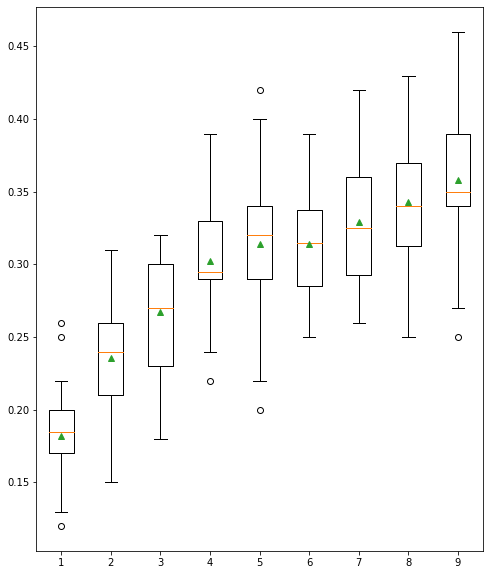

In [105]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,10):
		steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see a general trend of increased performance as the number of dimensions is increased. On this dataset, the results suggest a trade-off in the number of dimensions vs. the classification accuracy of the model.

The results suggest using the default of nine components achieves the best performance on this dataset, although with a gentle trade-off as fewer dimensions are used.

#4. Dimentionality Reduction

Data is available [here](https://github.com/ashushekar/feature-extraction/tree/master/data)

In [108]:
! ls drive/MyDrive/data_extraction/

Index		   segmentation.names  test.csv
segmentation.data  segmentation.test   train.csv


In [115]:
import warnings
import os
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings any
warnings.filterwarnings('ignore')

# To decide display window width on console
DESIRED_WIDTH = 320
pd.set_option('display.width', DESIRED_WIDTH)
np.set_printoptions(linewidth=DESIRED_WIDTH)
pd.set_option('display.max_columns', 30)

INPUTTRAINFILE = "drive/MyDrive/data_extraction/segmentation.test"
INPUTTESTFILE = "drive/MyDrive/data_extraction/segmentation.data"
TRAINFILE = "drive/MyDrive/data_extraction/train.csv"
TESTFILE = "drive/MyDrive/data_extraction/test.csv"

ATTRIBUTES = None

In [135]:
def filldatasetfile(inputfile, outputfile):
    """
        Creates the CSV File
    :param inputfile:
    :param outputfile:
    :return:
    """
    global ATTRIBUTES
    nfirstlines = []
    with open(inputfile) as _inp, open(outputfile, "w") as out:
        for i in range(5):
            if i == 3:
                ATTRIBUTES = ['LABELS'] + next(_inp).rstrip('\n').split(',')
            else:
                nfirstlines.append(next(_inp))
        for line in _inp:
            out.write(line)


def extractdata():
    """
        Extract and return the segmentation data in pandas dataframe format
    :return:
    """
    np.random.seed(0)
    if os.path.exists(TRAINFILE):
        os.remove(TRAINFILE)
    if os.path.exists(TESTFILE):
        os.remove(TESTFILE)

    filldatasetfile(INPUTTRAINFILE, TRAINFILE)
    filldatasetfile(INPUTTESTFILE, TESTFILE)

    # Convert csv to pandas dataframe
    traindata = pd.read_csv("drive/MyDrive/data_extraction/train.csv", header=None)
    testdata = pd.read_csv("drive/MyDrive/data_extraction/test.csv", header=None)
    traindata.columns = testdata.columns = ATTRIBUTES

    # Shuffle the dataframe
    traindata = traindata.sample(frac=1).reset_index(drop=True)
    testdata = testdata.sample(frac=1).reset_index(drop=True)

    return traindata, testdata


def preprocessdata(data):
    """
        Preprocess the data with StandardScalar and Label Encoder
    :param data: input dataframe of training or test set
    """
    labels = data['LABELS']
    features = data.drop(['LABELS'], axis=1)
    columns = features.columns
    enc = LabelEncoder()
    enc.fit(labels)
    labels = enc.transform(labels)
    features = StandardScaler().fit_transform(features)
    return features, labels, columns, data['LABELS']


def applyrandomforest(trainX, testX, trainY, testY):
    """
        Apply Random forest on input dataset.
    """
    start = time.process_time()
    forest = RandomForestClassifier(n_estimators=700, max_features='sqrt', max_depth=15)
    forest.fit(trainX, trainY)
    print("Time Elapsed: %s secs" % (time.process_time() - start))
    prediction = forest.predict(testX)
    print("Classification Report after applying Random Forest: ")
    print("----------------------------------------------------")
    print(classification_report(testY, prediction))


def applypca1(trainX, testX, trainY, testY, columns):
    """
        Apply PCA on the dataset
    """
    # Fitting the PCA algorithm with our Data
    pca = PCA()
    pca.fit(trainX)
    # Plotting the Cumulative Summation of the Explained Variance
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')  # for each component
    plt.title('Segmentation Dataset Explained Variance')
    plt.show(block=True)

def applypca2(trainX, testX, trainY, testY, columns):
    pca = PCA(n_components=12)
    pca.fit(Xtrain)
    trainX_pca = pca.transform(trainX)
    testX_pca = pca.transform(testX)
    applyrandomforest(trainX_pca, testX_pca, trainY, testY)

def applypca3(trainX, testX, trainY, testY, columns):

    # Visualizing the PCA coefficients using a heat map
    plt.matshow(pca.components_, cmap='viridis')
    plt.yticks(range(12), range(12))
    plt.colorbar()
    plt.xticks(range(len(columns)), columns, rotation=60, ha='left')
    plt.xlabel('Feature')
    plt.ylabel('Principal Components')
    plt.show(block=True)


def applylda(trainX, testX, trainY, testY, actual_labels):
    lda = LinearDiscriminantAnalysis()
    lda.fit(trainX, trainY)
    # Plotting the Cumulative Summation of the Explained Variance
    plt.figure()
    plt.plot(np.cumsum(lda.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')  # for each component
    plt.title('Segmentation Dataset Explained Variance')
    plt.show(block=True)
    lda = LinearDiscriminantAnalysis(n_components=5)
    lda.fit(trainX, trainY)
    trainX_lda = lda.transform(trainX)
    testX_lda = lda.transform(testX)
    # Plot Pairwise relationship between LDA components
    plt.figure(figsize=(10, 8), dpi=80)
    visualizedf = pd.DataFrame(trainX_lda, columns=['LDA1', 'LDA2', 'LDA3', 'LDA4', 'LDA5'])
    visualizedf = pd.concat([visualizedf, pd.DataFrame(actual_labels, columns=['LABELS'])], axis=1)
    print(visualizedf.sample(n=5))
    sns.pairplot(visualizedf, vars=visualizedf.columns[:-1], hue="LABELS", palette="husl")
    plt.show(block=True)
    applyrandomforest(trainX_lda, testX_lda, trainY, testY)


def applytsne1(trainX, trainY):
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(trainX, trainY)
    # transform the data onto the first two principal components
    trainX_lda = lda.transform(trainX)
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E"]
    plt.figure(figsize=(10, 10))
    plt.xlim(trainX_lda[:, 0].min(), trainX_lda[:, 0].max())
    plt.ylim(trainX_lda[:, 1].min(), trainX_lda[:, 1].max())
    for i in range(len(trainX_lda)):
        # actually plot the digits as text instead of using scatter
        plt.text(trainX_lda[i, 0], trainX_lda[i, 1], str(trainY[i]),
                 color=colors[trainY[i]], fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("LDA 0")
    plt.ylabel("LDA 1")
    plt.show(block=True)

def applytsne2(trainX, trainY):
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E"]
    # Apply tSNE from Manifold learning for better visualization
    tsne = TSNE(random_state=21)
    # use fit_transform instead of fit, as TSNE has no transform method
    trainX_tsne = tsne.fit_transform(trainX)
    plt.figure(figsize=(10, 10))
    plt.xlim(trainX_tsne[:, 0].min(), trainX_tsne[:, 0].max())
    plt.ylim(trainX_tsne[:, 1].min(), trainX_tsne[:, 1].max())
    for i in range(len(trainX_tsne)):
        # actually plot the digits as text instead of using scatter
        plt.text(trainX_tsne[i, 0], trainX_tsne[i, 1], str(trainY[i]),
                 color=colors[trainY[i]], fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("t-SNE feature 0")
    plt.ylabel("t-SNE feature 1")
    plt.show(block=True)

In [119]:
TRAINDATA, TESTDATA = extractdata()
print(TRAINDATA.head(n=5))

      LABELS  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN   VEDGE-SD  HEDGE-MEAN   HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  SATURATION-MEAN  HUE-MEAN
0     WINDOW                 86.0                155.0                   9                   0.0                   0.0    4.277778  10.551853    5.388889  60.240738        8.740741     6.666666     12.888889       6.666666   -6.222222    12.444445     -6.222222   12.888889         0.392385 -2.079296
1        SKY                120.0                 74.0                   9                   0.0                   0.0    0.333335   0.088889    0.500001   0.077778      101.851850    89.111115    123.222220      93.222220  -38.222220    64.111115    -25.888890  123.222220         0.276784 -2.220553
2       PATH                137.0                163.0                   9                   0.0 

Further, we will start with the preprocessing the training and test set. Class column LABELS has to be converted to label encoded format which can be easily done using LabelEncoder from scikit-learn package. Also we will ensure to use StandardScalar to bring all attributes to the same magnitude with mean as 0 and the variance as 1.

In [120]:
Xtrain, Ytrain, COLUMNS, ACTUAL_LABELS = preprocessdata(TRAINDATA)
Xtest, Ytest, _, _ = preprocessdata(TESTDATA)

Before applying any feature extraction techniques like PCA or LDA, we will check what’s the performance of Random Forest model on the input dataset.

In [121]:
applyrandomforest(Xtrain, Xtest, Ytrain, Ytest)

Time Elapsed: 4.661236028000019 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.98        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.93      0.97        30

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



The evaluation results from Classification Report is very much impressive and gives almost 99% accuracy on the test set with total samples of 210.

## 4.1. PCA
PCA is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. In this way, PCA can be used for dimensionality reduction by retaining only some of the principal components. It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data.


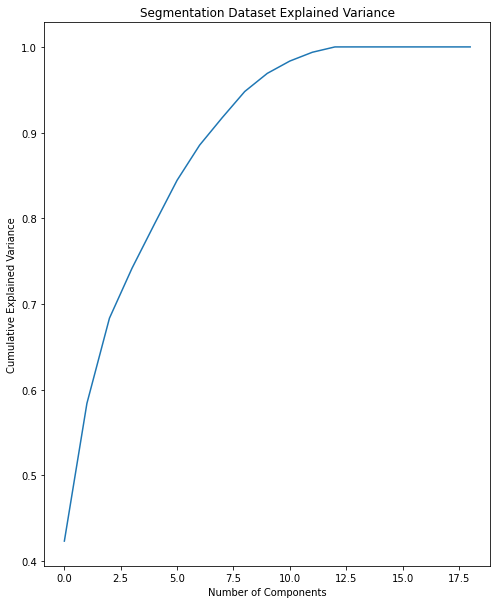

In [126]:
applypca1(Xtrain, Xtest, Ytrain, Ytest, columns=COLUMNS)

This curve quantifies how much of the total, 19-dimensional variance is contained within the first N components. For example, we see that with the segmentation dataset the first 5 components contain approximately 75% of the variance, while you need around 12 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we’d need about 12 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

Hence, we will keep n_components = 12 and extract the principal components followed by giving it to the existing Random Forest model to evaluate performance:


In [127]:
applypca2(Xtrain, Xtest, Ytrain, Ytest, columns=COLUMNS)

Time Elapsed: 6.234650976000012 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.97      1.00      0.98        30
           2       0.97      0.97      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.93      0.97        30

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



After applying PCA, performance is still the best even after reducing number of features from 19 to 12.

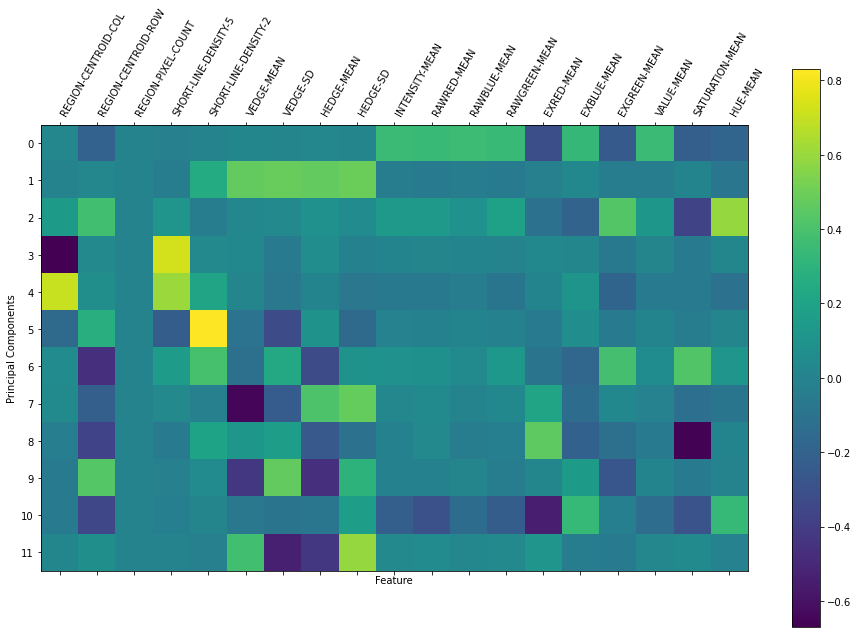

In [128]:
applypca3(Xtrain, Xtest, Ytrain, Ytest, columns=COLUMNS)

You can see that in the first 3 components, all features have almost the same sign (near to 0.0). That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. From 3rd component has mixed signs, and further components involve all of the 19 features from Image Segmentation Dataset.

# 4.2. LDA

LDA is supervised learning dimensionality reduction technique and aims to maximize the distance between the mean of each class and minimize the spreading within the class itself. LDA uses therefore within classes and between classes as measures. This is a good choice because maximizing the distance between the means of each class when projecting the data in a lower-dimensional space can lead to better classification results.

When using LDA, is assumed that the input data follows a Gaussian Distribution (like in this case), therefore applying LDA to not Gaussian data can possibly lead to poor classification results.

For our dataset, again it is vital to determine the number of components needed for LDA. We will take the help of cumulative explained variance ratio as a function of the number of components.

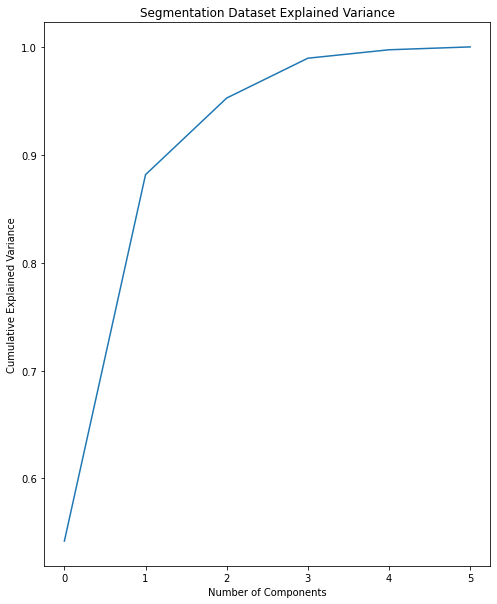

           LDA1      LDA2      LDA3      LDA4      LDA5     LABELS
213   -2.626145 -6.237686  0.610770 -0.004843  0.225692        SKY
1     -2.809265 -6.631246  0.413503  0.563860 -0.057595        SKY
1783  11.647377 -0.760909  0.383086  0.016993  0.037919      GRASS
2046  -1.947659  3.698630  1.015154  2.905195 -0.521981  BRICKFACE
721   10.936303 -1.286314 -1.353032  1.078538 -0.091325      GRASS


<Figure size 800x640 with 0 Axes>

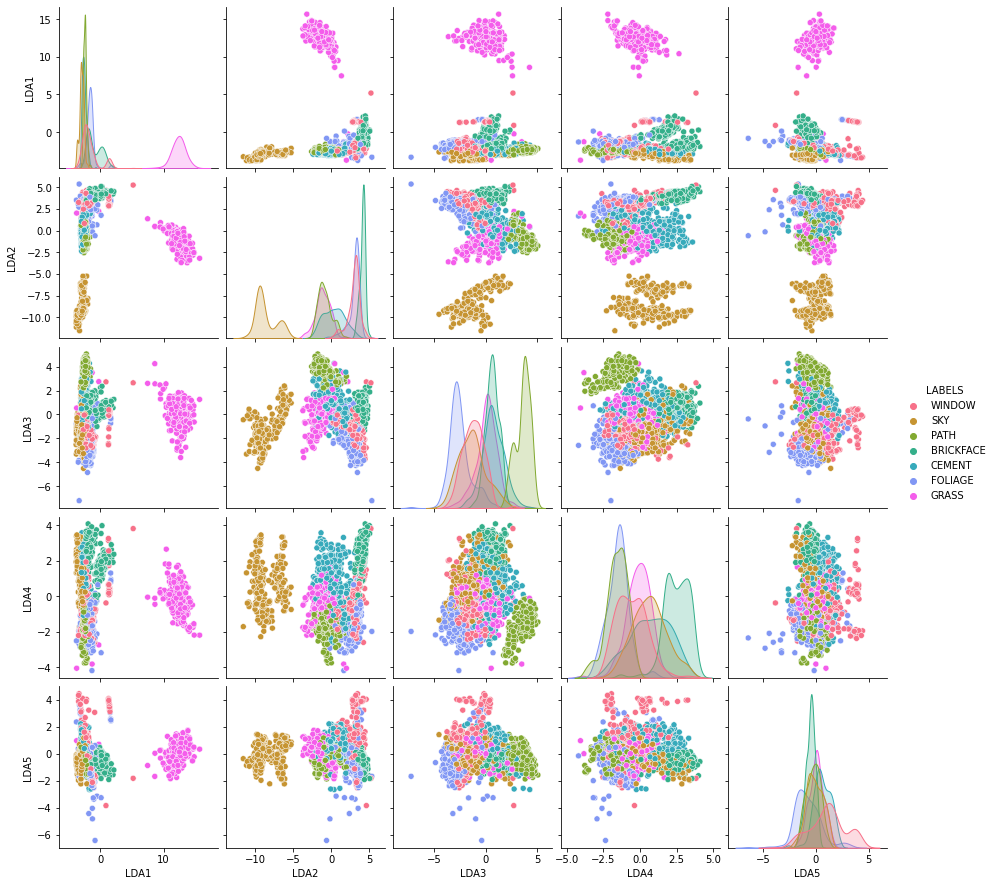

Time Elapsed: 3.824120516000022 secs
Classification Report after applying Random Forest: 
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      0.93      0.97        30

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



In [131]:
applylda(Xtrain, Xtest, Ytrain, Ytest, actual_labels=ACTUAL_LABELS)


The first 5 components (0 to 4) is enough to explain the 100% variance in dataset. Hence, after applying LDA and Random Forest we can see evaluation results. 

The evaluation performance is better than PCA because LDA gives similar performance but with reduced number of components.

## PCA vs LDA
Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

Although it might sound intuitive that LDA is superior to PCA for a multi-class classification task where the class labels are known, this might not always the case.

For example, comparisons between classification accuracies for image recognition after using PCA or LDA show that PCA tends to outperform LDA if the number of samples per class is relatively small (PCA vs. LDA, A.M. Martinez et al., 2001). In practice, it is also not uncommon to use both LDA and PCA in combination: E.g., PCA for dimensionality reduction followed by an LDA.

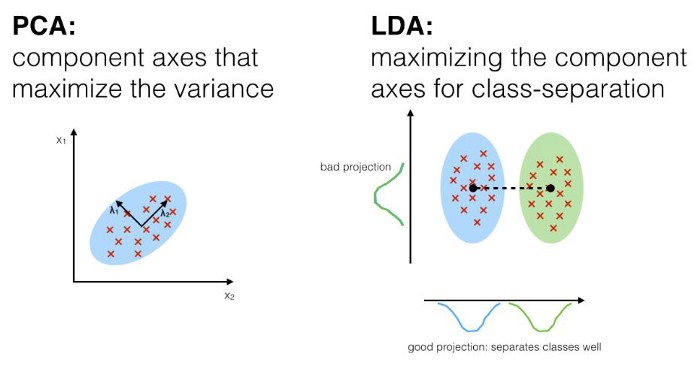

## 4.3. t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-Distributed Stochastic Neighbor Embedding (t-SNE) [Original paper](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is a very popular and state of the art dimensionality reduction technique that is usually used to map high dimensional data to 2 or 3 dimensions in order to visualize it. It does so by computing affinities between points, and trying to maintain these affinities in the new, low-dimensional space.


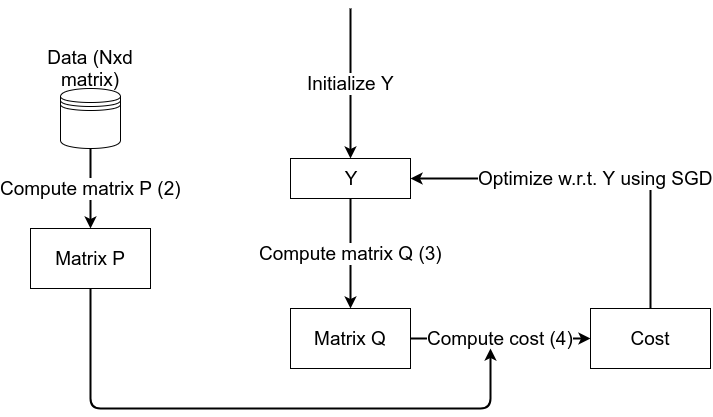

 t-SNE algorithm workflow. The loop only stops when Y doesn’t change much between iterations

1. Compute matrix P from the Data using Equation (1)
2. Initialize Y (the embeddings) randomly
3. Compute matrix Q from current Y using Equation (2)
4. Compute cost from matrix P and Q using Equation (3)
5. Compute the gradient of the cost with respect to Y and update Y
6. Go back to step 3

Can t-SNE help feature selection?

t-SNE is mostly used to visualize high dimensional data by embedding it in a 2D space. Since it ignores the classes, it can't tell you which variables are important for classification.

PCA also ignores the classes, so although it can tell you which variables explain the variance of the data, that might not be the same as which variables best distinguish the classes.

Linear Discriminant does include the classes so may be more useful.

While LDA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, but the nature of the method (calculating variance difference between classes) limits its usefulness.

Hence, there is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings and often provide better visualizations. A particularly useful one is the t-distributed Stochastic Neighbor Embedding (t-SNE).

For our Image Segmentation Dataset, it is difficult to represent original labels as data points on scatterplot, hence we will map them to integer labels

{BRICKFACE = 0, CEMENT = 1, FOLIAGE = 2, GRASS = 3, PATH =4, SKY = 5, WINDOW = 6}

And n_components we will consider as 2 because it is easier to proceed with scatterplot between only 2 components from LDA.

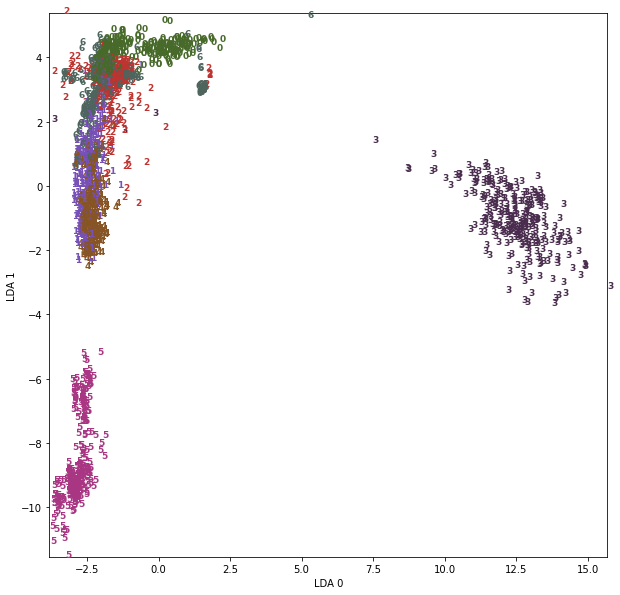

In [133]:
applytsne1(Xtrain, Ytrain)

Data points with labels 5 and 3 are well separated from other data points but most of the other data points still overlap significantly.

Now let us apply t-SNE. But before that what is t-SNE? The idea behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between data points as best as possible. t-SNE starts with a random two-dimensional representation for each data point, and then tries to make points that are close in a original feature space closer, and points that are far apart in the original feature space farther apart. t-SNE puts more emphasis on points that are close by, rather than preserving distances between far-apart points. In other words, it tries to preserve the information indicating which points are neighbors to each other.

We will apply t-SNE which is available from scikit-learn.s

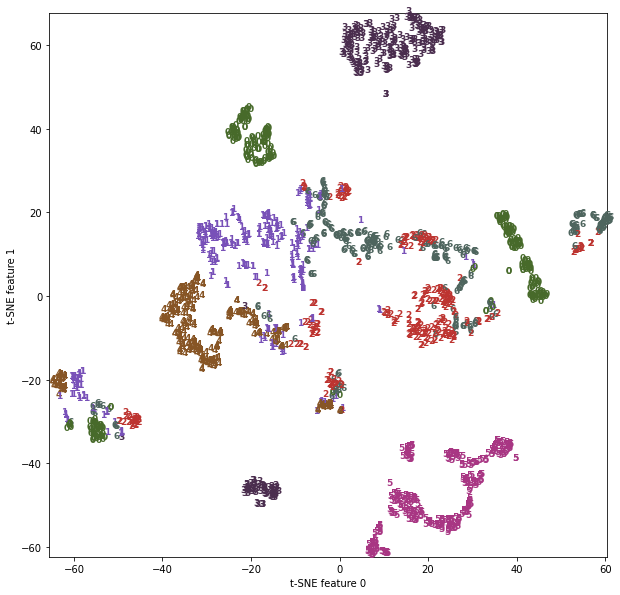

In [136]:
applytsne2(Xtrain, Ytrain)

The result of t-SNE is quite remarkable. All the classes are quite clearly separated. The 3s (GRASS) and 5s (SKY) are somewhat split up, but most of the classes form a single dense group.

Note: t-SNE method has no knowledge of the class labels; it is completely unsupervised. Still, it can find a representation of the data in 2-dimensions that clearly separates the classes, based on how close points are in the original space.

The t-SNE algorithm has some tuning parameters, though it often works well with default settings. You can try playing with ```perplexity``` and ```early_exaggeration```, but the effects are usually minor.